# Analyse the demographics of the workshop

Who came, with what level, and how many stayed to the end. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Set some default parameters for the matplotlib figures. I want to use the [seaborn](http://seaborn.pydata.org/) style sheet with larger text, all  figures to have the same size, and have a white (instead of transparent) background.

In [2]:
plt.style.use(['seaborn', 'seaborn-talk'])
plt.rc('figure', facecolor='#ffffff')
plt.rc('figure', figsize=(10, 5))

## Load the demographics data

Data from the Google forms sign up. I exported the data (without names and emails) to the file `demographics.csv` in this repository. 

I'll use `pandas` library to load and manipulate the data.

In [3]:
data = pd.read_csv('demographics.csv')

In [4]:
data

,os,experience,languages,position,field
0,Mac (OSX),Did a little bit of shell scripting,"Python, Matlab/Octave",Graduate student,Geophysics
1,Mac (OSX),"Took a basic programming course, Self-taught w...","C/C++, Fortran, Matlab/Octave",Faculty,Plate Tectonics
2,Mac (OSX),"Took a basic programming course, Took intermed...","C/C++, Matlab/Octave, JAVA, VRML, MEL, UnrealS...",Graduate student,GG (Hydrology)
3,Windows,Took a basic programming course,Matlab/Octave,Staff,Geology and Geophysics
4,Mac (OSX),Took a basic programming course,"C/C++, Matlab/Octave",Graduate student,Geochemistry
5,Mac (OSX),Took a basic programming course,"Matlab/Octave, I use matlab from time to time ...",Graduate student,Coastal Geology & sea-level rise
6,Windows,Self-taught with moderate/advanced experience,"Fortran, Matlab/Octave, R",Postdoc,Watershed hydrology
7,Windows,Did a little bit of shell scripting,Matlab/Octave,Graduate student,Mineral Physics
8,Mac (OSX),"Took a basic programming course, Took intermed...","Python, C/C++, Matlab/Octave",Faculty,Mineral Physics
9,Mac (OSX),Took intermediate/advanced programming course,"Matlab/Octave, R",Graduate student,geophysics


## Attendance

First lets see the number of people who signed up:

In [5]:
len(data)

35

From the shared notes, I also know how many people showed up after each day.

In [6]:
attendance = pd.Series([len(data), 31, 21, 21], index=['Signed up', 'Day 1', 'Day 2', 'Day 3'])

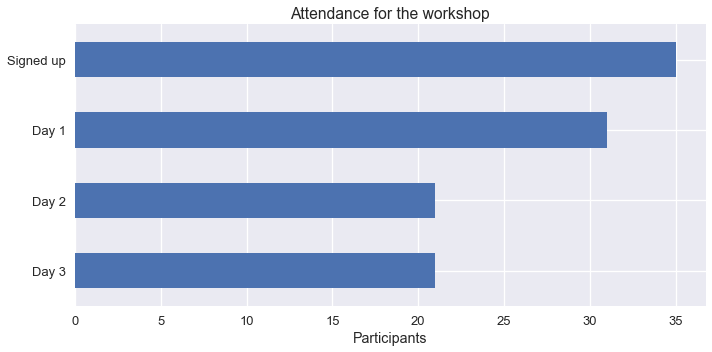

In [7]:
plt.figure()
ax = plt.subplot(111)
attendance.plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_title('Attendance for the workshop')
ax.set_xlabel('Participants')
plt.tight_layout()
plt.savefig('figures/attendance.jpg')
plt.show()

 We had a bit of a drop off after the first day. The people who came the seconda day also came on the third. Not too bad.

## Programming experience

Let's first look at the programming experience declared by the participants. I'll keep only the highest level declared and count how many people declared that level.

In [8]:
# Keep only the last (highest) element in the declared experience
data['highest_experience'] = pd.Series([e.split(', ')[-1] for e in data['experience']])

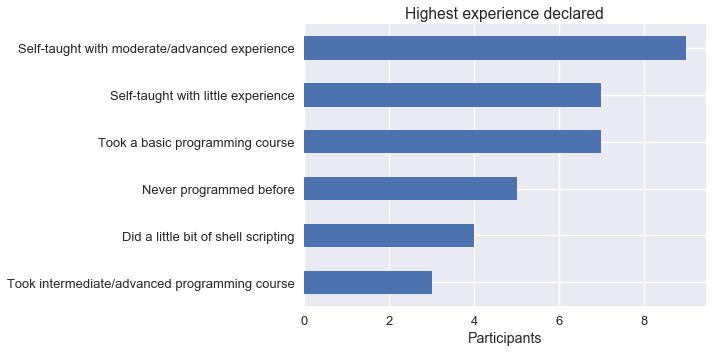

In [9]:
plt.figure()
ax = plt.subplot(111)
data.highest_experience.value_counts().plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_title('Highest experience declared')
ax.set_xlabel('Participants')
plt.tight_layout()
plt.savefig('figures/education.jpg')
plt.show()

The workshop participants have very mixed experience levels, from people who have never programmed before to self-taught programmers. That was expected and it's also not surprising that very few people indicated that they reached their level by taking an advanced course.

## Programming languages

Let's look at the programming language experience. I'll focus on a few main languages and group the others into "Others".

In [10]:
main_languages = ['Python', 'Matlab/Octave', 'C/C++', 'Fortran', 'R', "None (I told I've never programmed before)"]

Make a function to mark any other language as "Other" and simplify the "None" entry.

In [11]:
def only_main(lang):
    if lang not in main_languages:
        lang = 'Other'
    if lang == "None (I told I've never programmed before)":
        lang = 'None'
    return lang

In [12]:
languages = pd.Series([only_main(lang) 
                       for entry in data['languages'] 
                       for lang in entry.split(', ')]).value_counts()

In [13]:
languages

Matlab/Octave    20
Other            15
Python           11
R                 9
C/C++             7
Fortran           5
None              5
dtype: int64

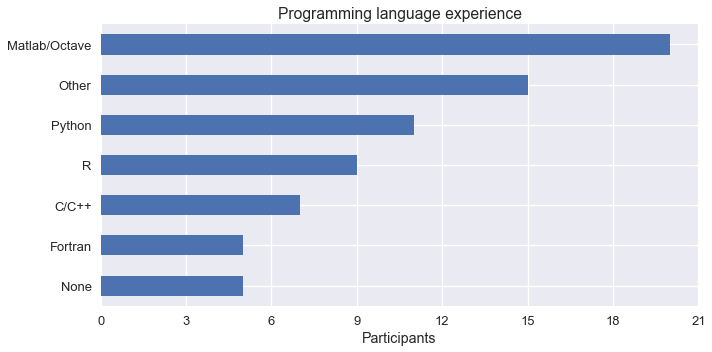

In [14]:
plt.figure()
ax = plt.subplot(111)
languages.plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_title('Programming language experience')
ax.set_xlabel('Participants')
ax.set_xticks(range(0, 22, 3))
plt.tight_layout()
plt.savefig('figures/programming-languages.jpg')
plt.show()

The dominant language in the department is clearly Matlab, though a few people also know R. Fortran is very low here apparently.

## Position at the University

Finally, we can look at what the participants do.

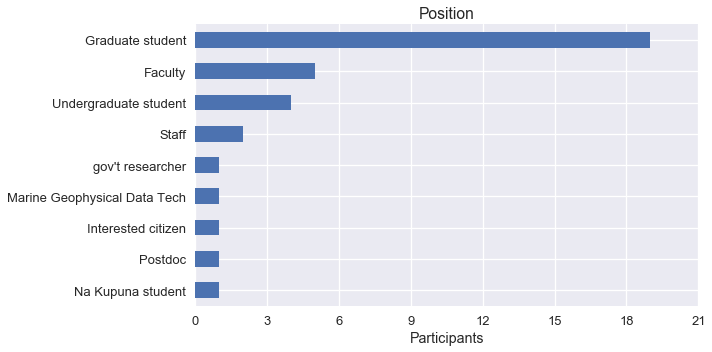

In [15]:
plt.figure()
ax = plt.subplot(111)
data['position'].value_counts().plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_title('Position')
ax.set_xlabel('Participants')
ax.set_xticks(range(0, 22, 3))
plt.tight_layout()
plt.savefig('figures/position.jpg')
plt.show()

Not surprisingly, a majority are grad students. I was very pleased to have someone from the [Na Kupuna program](https://www.hawaii.edu/diversity/seed-programs/na-kupuna-senior-citizen-visitor-program/) and a not insignificant number of faculty.